# Lasso Notebook

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')


housing = pd.read_csv('housing_mar5.csv', index_col=0)
housing.shape

(2578, 178)

In [59]:
housetarg = pd.Series(housing.SalePrice_Log, name='target')
housefeature = housing.drop('SalePrice_Log',axis=1)

In [60]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(housefeature, housetarg)
Xtrain.shape, Xtest.shape

((1933, 177), (645, 177))

In [29]:
import numpy as np
alphas = np.linspace(0.00001,.0001,100)
#.0001-.001, 

### Lasso Gridsearch CV

In [6]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
#randomized is faster
from sklearn.linear_model import Lasso

In [7]:
lasso = Lasso(normalize=True)

In [32]:
grid = GridSearchCV(estimator=lasso, param_grid={'alpha':alphas}, cv=10, return_train_score=True)
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=10, estimator=Lasso(normalize=True),
             param_grid={'alpha': array([1.00000000e-05, 1.09090909e-05, 1.18181818e-05, 1.27272727e-05,
       1.36363636e-05, 1.45454545e-05, 1.54545455e-05, 1.63636364e-05,
       1.72727273e-05, 1.81818182e-05, 1.90909091e-05, 2.00000000e-05,
       2.09090909e-05, 2.18181818e-05, 2.27272727e-05, 2.36363636e-05,
       2.45454545e-05, 2.54545455e-05, 2....
       7.90909091e-05, 8.00000000e-05, 8.09090909e-05, 8.18181818e-05,
       8.27272727e-05, 8.36363636e-05, 8.45454545e-05, 8.54545455e-05,
       8.63636364e-05, 8.72727273e-05, 8.81818182e-05, 8.90909091e-05,
       9.00000000e-05, 9.09090909e-05, 9.18181818e-05, 9.27272727e-05,
       9.36363636e-05, 9.45454545e-05, 9.54545455e-05, 9.63636364e-05,
       9.72727273e-05, 9.81818182e-05, 9.90909091e-05, 1.00000000e-04])},
             return_train_score=True)

In [33]:
grid.score(Xtest,ytest)

0.9276969402338952

In [34]:
best_model = grid.best_estimator_
best_model.score(Xtest, ytest)

0.9276969402338952

In [35]:
best_model.coef_

array([ 8.04078066e-02, -0.00000000e+00,  0.00000000e+00, -4.22110782e-03,
        1.42511239e-01, -2.47906636e-03,  5.13328751e-02,  4.10292957e-02,
        2.36334670e-03,  4.96437369e-04,  0.00000000e+00, -0.00000000e+00,
        4.07944228e-01,  4.34752968e-05,  1.18904520e-02, -1.03947554e-03,
        4.32191083e-03, -0.00000000e+00,  1.84571544e-02,  3.81647721e-03,
        8.14748332e-05,  0.00000000e+00,  4.28408003e-05, -0.00000000e+00,
        6.35797618e-05,  1.39296250e-02,  4.98926630e-02, -3.55354497e-04,
       -4.86938515e-04,  7.77940268e-03, -7.50967236e-03, -3.68778032e-02,
        2.60102768e-02,  3.53609191e-03,  2.23099983e-02,  3.60583448e-02,
        2.65424449e-04,  8.66387007e-03,  3.08935723e-05,  3.81778610e-05,
        5.68070749e-05,  4.55692808e-05,  1.61804793e-04,  2.76106305e-05,
        0.00000000e+00,  0.00000000e+00, -2.22564611e-02, -0.00000000e+00,
        5.46417823e-02,  6.06566341e-02, -0.00000000e+00,  0.00000000e+00,
       -8.93431743e-03, -

In [38]:
print(grid.best_score_)
print(grid.best_params_)

0.9304311051140722
{'alpha': 2.7272727272727276e-05}


In [ ]:
# print(grid.cv_results_.keys())
# print(grid.cv_results_)

In [41]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.038056,0.005534,0.004385,0.001559,1e-05,{'alpha': 1e-05},0.931328,0.909910,0.943770,0.943320,0.918177,0.916689,0.940355,0.942003,0.940555,0.913569,0.929968,0.013123,40,0.946654,0.948109,0.944262,0.945147,0.947710,0.947575,0.945856,0.945390,0.944685,0.948184,0.946357,0.001402
1,0.033678,0.003154,0.003987,0.001097,1.09091e-05,{'alpha': 1.090909090909091e-05},0.931410,0.910083,0.943789,0.943293,0.918063,0.916724,0.940449,0.942174,0.940688,0.913481,0.930015,0.013148,38,0.946576,0.948050,0.944197,0.945085,0.947650,0.947501,0.945767,0.945330,0.944612,0.948119,0.946289,0.001403
2,0.037654,0.004970,0.005154,0.002777,1.18182e-05,{'alpha': 1.1818181818181819e-05},0.931484,0.910245,0.943770,0.943268,0.918017,0.916748,0.940541,0.942344,0.940816,0.913383,0.930061,0.013168,36,0.946493,0.947986,0.944128,0.945026,0.947590,0.947421,0.945682,0.945270,0.944548,0.948051,0.946219,0.001402
3,0.032725,0.004395,0.004405,0.001434,1.27273e-05,{'alpha': 1.2727272727272728e-05},0.931542,0.910399,0.943733,0.943246,0.917899,0.916751,0.940604,0.942504,0.940928,0.913285,0.930089,0.013191,34,0.946424,0.947917,0.944056,0.944963,0.947526,0.947345,0.945600,0.945208,0.944479,0.947980,0.946150,0.001402
4,0.032244,0.004924,0.005258,0.001843,1.36364e-05,{'alpha': 1.3636363636363638e-05},0.931613,0.910539,0.943649,0.943220,0.917816,0.916736,0.940659,0.942658,0.941035,0.913196,0.930112,0.013209,32,0.946355,0.947845,0.943984,0.944896,0.947459,0.947275,0.945513,0.945142,0.944405,0.947905,0.946078,0.001402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.023990,0.004901,0.003889,0.001141,9.63636e-05,{'alpha': 9.636363636363637e-05},0.932282,0.907702,0.940695,0.934311,0.913451,0.917428,0.933708,0.942358,0.943670,0.904982,0.927059,0.014000,96,0.937640,0.939050,0.935524,0.936390,0.938756,0.938743,0.936525,0.936277,0.935747,0.939355,0.937401,0.001398
96,0.025563,0.004024,0.003160,0.000453,9.72727e-05,{'alpha': 9.727272727272728e-05},0.932268,0.907646,0.940668,0.934208,0.913405,0.917401,0.933617,0.942321,0.943666,0.904919,0.927012,0.014007,97,0.937547,0.938963,0.935432,0.936303,0.938669,0.938658,0.936443,0.936183,0.935650,0.939263,0.937311,0.001400
97,0.021523,0.003499,0.004491,0.001412,9.81818e-05,{'alpha': 9.818181818181818e-05},0.932257,0.907590,0.940639,0.934103,0.913359,0.917373,0.933525,0.942285,0.943663,0.904854,0.926965,0.014014,98,0.937456,0.938876,0.935342,0.936215,0.938580,0.938576,0.936360,0.936091,0.935554,0.939171,0.937222,0.001401
98,0.021721,0.002973,0.003660,0.000710,9.90909e-05,{'alpha': 9.90909090909091e-05},0.932245,0.907532,0.940609,0.933998,0.913312,0.917344,0.933433,0.942248,0.943661,0.904788,0.926917,0.014022,99,0.937363,0.938788,0.935254,0.936127,0.938492,0.938493,0.936277,0.935999,0.935460,0.939078,0.937133,0.001401


In [42]:
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# look for the best test set performance

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
19,0.029858,0.003070,0.003897,0.001488,2.72727e-05,{'alpha': 2.7272727272727276e-05},0.932524,0.911693,0.943328,0.942607,0.917074,0.917255,0.940614,0.944367,0.942706,0.912143,0.930431,0.013435,1,0.945187,0.946535,0.942802,0.943536,0.946221,0.946144,0.944207,0.943831,0.943141,0.946715,0.944832,0.001424
20,0.028428,0.003385,0.003810,0.000863,2.81818e-05,{'alpha': 2.818181818181818e-05},0.932569,0.911705,0.943296,0.942506,0.917054,0.917310,0.940598,0.944417,0.942788,0.912057,0.930430,0.013442,2,0.945102,0.946437,0.942716,0.943454,0.946138,0.946067,0.944119,0.943741,0.943058,0.946631,0.944747,0.001424
18,0.029531,0.003999,0.004246,0.001447,2.63636e-05,{'alpha': 2.6363636363636365e-05},0.932475,0.911675,0.943359,0.942695,0.917092,0.917201,0.940626,0.944313,0.942616,0.912226,0.930428,0.013428,3,0.945269,0.946630,0.942888,0.943629,0.946300,0.946220,0.944296,0.943923,0.943225,0.946798,0.944918,0.001422
21,0.029721,0.004123,0.004455,0.001768,2.90909e-05,{'alpha': 2.9090909090909093e-05},0.932612,0.911700,0.943260,0.942401,0.917032,0.917370,0.940580,0.944463,0.942872,0.911978,0.930427,0.013449,4,0.945015,0.946349,0.942627,0.943373,0.946053,0.945988,0.944029,0.943647,0.942977,0.946547,0.944661,0.001424
22,0.029899,0.003683,0.003591,0.000514,3e-05,{'alpha': 3.0000000000000004e-05},0.932651,0.911690,0.943216,0.942296,0.917006,0.917426,0.940559,0.944503,0.942935,0.911903,0.930419,0.013454,5,0.944926,0.946258,0.942536,0.943295,0.945967,0.945908,0.943937,0.943551,0.942895,0.946461,0.944573,0.001425


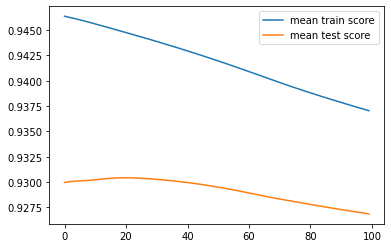

In [43]:
cv_results['mean_train_score'].plot(label='mean train score')
cv_results['mean_test_score'].plot(label='mean test score')
plt.legend(loc=1)

### Lasso model (user provides alpha)

In [75]:
lasso2 = Lasso(alpha=.0005, normalize=True)
lasso2.get_params()

{'alpha': 0.0005,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': True,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [76]:
lasso2.fit(housefeature,housetarg)

Lasso(alpha=0.0005, normalize=True)

In [77]:
print('Train score: ', lasso2.score(Xtrain,ytrain))
print('Test score: ', lasso2.score(Xtest,ytest))

Train score:  0.8982553347891759
Test score:  0.8687911889463986


In [78]:
lasso2.score(Xtest,ytest)

0.8687911889463986

In [79]:
print('the intercept is: %.2f' %(lasso2.intercept_))
coefs = pd.Series(abs(lasso2.coef_), index=housefeature.columns)

the intercept is: 3.91


In [83]:
coefs.sort_values(ascending=False).head(20)

GrLivArea_Log    0.340627
OverallQual      0.083636
LotArea_Log      0.060683
CentralAir       0.042589
KitchenQual      0.029075
Fireplaces       0.022461
MSZoning__RM     0.018237
GarageCars       0.017368
ExterQual        0.015450
OverallCond      0.009230
HeatingQC        0.006735
BsmtQual         0.005944
PavedDrive       0.005268
BsmtExposure     0.002964
BsmtFinType1     0.001662
YearBuilt        0.001194
YearRemodAdd     0.000863
TotalBsmtSF      0.000083
GarageArea       0.000078
BsmtFinSF1       0.000073
dtype: float64

In [89]:
housefeature2 = housefeature[['GrLivArea_Log','OverallQual','LotArea_Log','CentralAir','KitchenQual',
                             'Fireplaces','MSZoning__RM','GarageCars','ExterQual','OverallCond','HeatingQC',
                             'BsmtQual','PavedDrive','BsmtExposure','BsmtFinType1','YearBuilt','YearRemodAdd',
                             'TotalBsmtSF','GarageArea','BsmtFinSF1']]

In [96]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(housefeature2,housetarg)

LinearRegression()

In [98]:
print('R^2 is equal to %.3f' %(lm.score(housefeature2, housetarg)))
print('RSS is equal to %.3f' %(np.sum((housetarg-lm.predict(housefeature2))**2)))
print('The intercept is %.3f' %(lm.intercept_))
print('The slopes are %s' %(lm.coef_))

R^2 is equal to 0.915
RSS is equal to 32.724
The intercept is 2.147
The slopes are [ 3.89075037e-01  6.89192364e-02  8.58536505e-02  4.42672911e-02
  3.02570552e-02  3.58055126e-02 -4.20048887e-02  2.20801974e-02
  3.15289684e-02  4.76306809e-02  1.71754442e-02  1.03074386e-02
  1.97055558e-02  1.47913220e-02  3.86193672e-03  2.09126618e-03
  4.02913870e-04  8.38569561e-05  7.07488930e-05  7.93734890e-05]


In [100]:
coefs = pd.Series(lm.coef_, index=housefeature2.columns)

In [101]:
coefs.sort_values(ascending=False).head(20)

GrLivArea_Log    0.389075
LotArea_Log      0.085854
OverallQual      0.068919
OverallCond      0.047631
CentralAir       0.044267
Fireplaces       0.035806
ExterQual        0.031529
KitchenQual      0.030257
GarageCars       0.022080
PavedDrive       0.019706
HeatingQC        0.017175
BsmtExposure     0.014791
BsmtQual         0.010307
BsmtFinType1     0.003862
YearBuilt        0.002091
YearRemodAdd     0.000403
TotalBsmtSF      0.000084
BsmtFinSF1       0.000079
GarageArea       0.000071
MSZoning__RM    -0.042005
dtype: float64

In [12]:
import numpy as np
(np.exp(.002091)-1)*100

0.20931876650367442

### Calculate RMSE

In [103]:
mse = np.mean((lm.predict(housefeature2)-housetarg)**2)
mse

0.012693622046090923

In [104]:
RMSE = np.sqrt(mse)
RMSE

0.11266597554759344

### Using `cross_val_score`

In [66]:
import sklearn.model_selection as ms
scores = ms.cross_val_score(estimator=lasso2, X=Xtrain, y=ytrain, cv=5)
scores = pd.Series(scores)

In [67]:
print(scores.round(3))
print('-'*40)
print('Score Mean %.3f' %(scores.mean()))
print('Score std deviation: %.3f' %(scores.std()))

0    0.865
1    0.879
2    0.869
3    0.882
4    0.846
dtype: float64
----------------------------------------
Score Mean 0.868
Score std deviation: 0.014
